In [1]:
%matplotlib inline

In [16]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from functools import reduce
from itertools import combinations

from stats import get_players, calculate_percentage_stats, rotoStatNames, retrieve_rosters
from algorithm import winner, sum_team_total, get_team, simulate_matchups

In [54]:
team_name_list = retrieve_rosters()
all_players = get_players()
teams = {i: get_team(all_players, team) for i, team in zip(range(1, 100), team_name_list)}
team_totals = sum_team_total(teams)

def player_trade(team_id_1, team_id_2, player_names_1, player_names_2):
    # Finds index of player in team
    def p_ind(lst, p):
        for i, player in enumerate(lst):
            if p == player[0]:
                return i
        return -1
    
    assert len(player_names_1) == len(player_names_2)
    assert team_id_1 in teams and team_id_2 in teams
    team_roster_1, team_roster_2 = teams[team_id_1], teams[team_id_2]
    for p1, p2 in zip(player_names_1, player_names_2):
        i = p_ind(team_roster_1, p1)
        j = p_ind(team_roster_2, p2)
        assert i != -1 and j != -1
        
        teams[team_id_1][i], teams[team_id_2][j] = teams[team_id_2][j], teams[team_id_1][i]
        global team_totals
        team_totals = sum_team_total(teams)

def free_agency_pickup(team_id, drop_players, add_players):
    # Finds index of player in team
    def p_ind(lst, p):
        for i, player in enumerate(lst):
            if p == player[0]:
                return i
        return -1
    
    assert len(drop_players) == len(add_players)
    team_roster = teams[team_id]
    free_agents = get_team(all_players, add_players)
    for p1, p2 in zip(drop_players, add_players):
        i = p_ind(team_roster, p1)
        j = p_ind(free_agents, p2)
        assert i != -1 and j != -1
        
        teams[team_id][i] = free_agents[j]
        global team_totals
        team_totals = sum_team_total(teams)
        
player_trade(7, 3, ["Luka Doncic"], ["Kyrie Irving"])
free_agency_pickup(7, ["Kevin Love"], ["Dewayne Dedmon"])
teams

{1: [('Stephen Curry',
   (-192, 369, 25, 92, 1881, 361, 354, 632, 1340, 263, 287)),
  ('Jimmy Butler', (-95, 342, 39, 123, 1215, 263, 67, 418, 904, 312, 365)),
  ('Jeremy Lamb', (-80, 434, 32, 88, 1208, 172, 115, 431, 979, 231, 260)),
  ('Julius Randle', (-208, 634, 45, 52, 1565, 229, 67, 571, 1089, 356, 487)),
  ('LaMarcus Aldridge',
   (-144, 744, 107, 43, 1727, 194, 10, 684, 1319, 349, 412)),
  ('Bradley Beal', (-224, 411, 58, 121, 2099, 448, 209, 764, 1609, 362, 448)),
  ('Jonas Valanciunas', (-90, 419, 53, 19, 763, 70, 14, 301, 538, 147, 185)),
  ('Enes Kanter', (-118, 659, 26, 32, 915, 116, 10, 375, 683, 155, 197)),
  ('Thomas Bryant', (-60, 454, 67, 25, 758, 92, 33, 309, 502, 107, 137)),
  ('Domantas Sabonis', (-160, 690, 30, 48, 1043, 212, 9, 413, 700, 208, 291)),
  ('Dwight Powell', (-67, 411, 50, 44, 815, 112, 39, 290, 486, 196, 254)),
  ('Derrick White', (-97, 247, 47, 67, 663, 263, 48, 260, 543, 95, 123))],
 2: [('Jrue Holiday',
   (-210, 334, 54, 109, 1420, 518, 118, 547,

In [57]:
print(winner(team_totals[7], team_totals[5]))
print(team_totals[7])
print(team_totals[5])
simulate_matchups(combinations(range(1, 9), 2), team_totals)
#teams

1
(-2388, 4471, 350, 1170, 18593, 5416, 2213, 0.4493932708218423, 0.8461538461538461)
(-2015, 5755, 539, 871, 16520, 3951, 1291, 0.46423669360988257, 0.8260281385281385)


{1: [3, 0, 4],
 2: [3, 0, 4],
 3: [3, 0, 4],
 4: [6, 0, 1],
 5: [5, 0, 2],
 6: [0, 0, 7],
 7: [7, 0, 0],
 8: [1, 0, 6]}

[(-2.2401500938086305, -1.2851782363977486),
 (4.194183864915572, 6.271106941838649),
 (0.32833020637898686, 0.7176360225140713),
 (0.6951219512195121, 1.0975609756097562),
 (10.085365853658537, 17.441838649155724),
 (2.193245778611632, 5.080675422138837),
 (0.5769230769230769, 2.075984990619137),
 (0.4493932708218423, 0.527517626012838),
 (0.7007715531700771, 0.8461538461538461)]

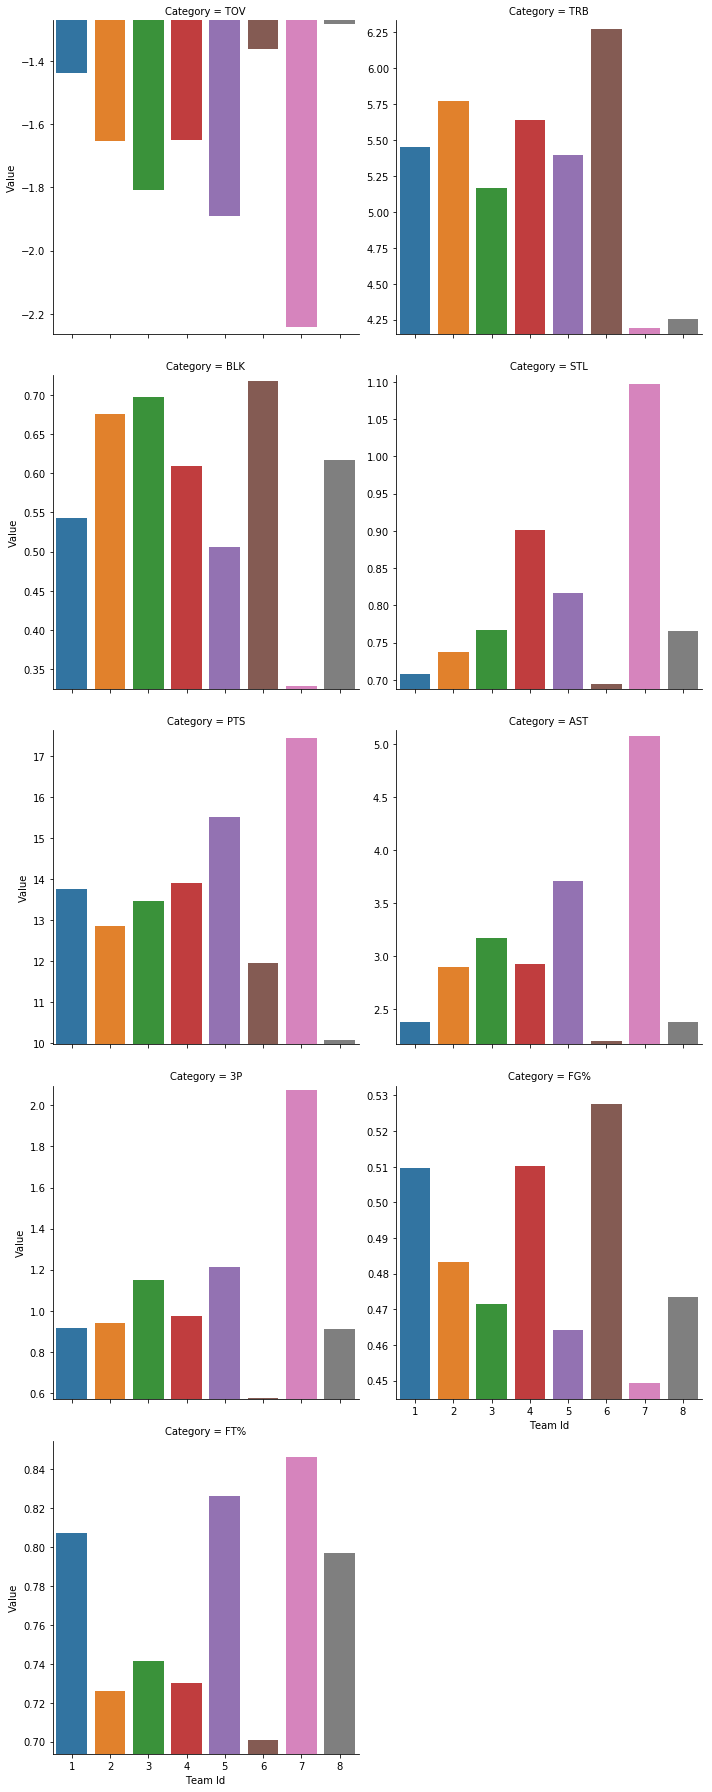

In [56]:
# hue is None
# x is team_name
# y is category value
# kind is bar
# col is category names
team_data = pd.DataFrame(columns=["Team Id", "Value", "Category"])
axis_lims = [(99999, -99999) for _ in range(len(rotoStatNames))]
for team_id in team_totals:
    for i, value in enumerate(team_totals[team_id]):
        adj_value = (value / (len(team_name_list[team_id - 1]) * 82)) if (i != 7 and i != 8) else value
        axis_lims[i] = (min(axis_lims[i][0], adj_value), max(axis_lims[i][1], adj_value))
        #print(len(team_name_list[team_id - 1]))
        team_data = team_data.append({"Team Id": team_id, "Value": adj_value, "Category": rotoStatNames[i]}, ignore_index=True)

g = sns.catplot(x="Team Id", y="Value", data=team_data, kind="bar", col="Category", col_wrap=2, sharey=False)
for i, ax in enumerate(g.axes.flat):
    lim = axis_lims[i]
    ax.set_ylim(lim[0] - 0.01*abs(lim[0]), lim[1] + 0.01*abs(lim[1]))
axis_lims